# Training | Supervised Learning and Ensembles 

**Introduction-**
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Objective:**
Build a model that will help them identify the potential customers who have higher probability of purchasing the loan.
This will increase the success ratio while at the same time reduce the cost of the campaign.

### Data Source
Bank_Personal_Loan_Modelling-1.xlsx

# Q1. Read the column description and ensure you understand each attribute well.

### Data Dictionary
Data Fields-
1. ID - Customer ID (Unique ID)
2. Age - Customer's age in completed years (Continous data)
3. Experience - #years of professional experience (Continous data)
4. Income - Annual income of the customer (000) (Continous data)
5. ZIPCode - Home Address ZIP code (Continous data)
6. Family - Family size of the customer (Continous data)
7. CCAvg - Avg. spending on credit cards per month (000) (Continous data)
8. Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional (Categorical data)
9. Mortgage - Value of house mortgage if any. (000) (Continous data)
10. **Personal Loan** - Did this customer accept the personal loan offered in the last campaign? (Categorical data)- This is our **Target Variable**
11. Securities Account - Does the customer have a securities account with the bank? (Categorical data)
12. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical data)
13. Online - Does the customer use internet banking facilities? (Categorical data)
14. CreditCard - Does the customer use a credit card issued by UniversalBank? (Categorical data)

From the above Data Dictionary we observe that there are 14 liability customer variables listed in the dataset.

Y = Personal Loan will be our Dependent/Target variable

X = Remaining features will be considered as Independent variables (Note- ID, ZIPCode will be taken care of during the exercise)

### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

### Data Ingestion

In [8]:
bank_df = pd.read_csv('../data/Bank_Personal_Loan_Modelling.csv')
df = bank_df.copy(deep=True)

In [9]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)

In [11]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
# Check for missing values
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


## Split the data into training and test set in the ratio of 70:30 respectively.

### Splitting data into Train and Test set

In [14]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split
Y = df['Personal_Loan']
X = df.drop(['ID', 'ZIP Code', 'Personal_Loan'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)


Random Forest Model accuracy =  0.9866666666666667

Test labels, Predicted labels


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

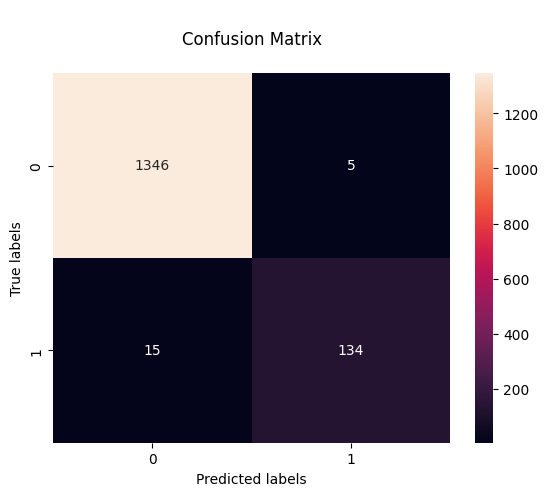

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=60)
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy10 = rf_clf.score(X_test, Y_test)
Y_predicted10 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy10)
print('\nTest labels, Predicted labels')
y_grid10 = (np.column_stack([Y_test, Y_predicted10]))
#print(y_grid10)


cm = metrics.confusion_matrix(Y_test, Y_predicted10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [49]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]

In [50]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf_clf.feature_importances_[indices[f]]]


<AxesSubplot:xlabel='importance', ylabel='feature'>

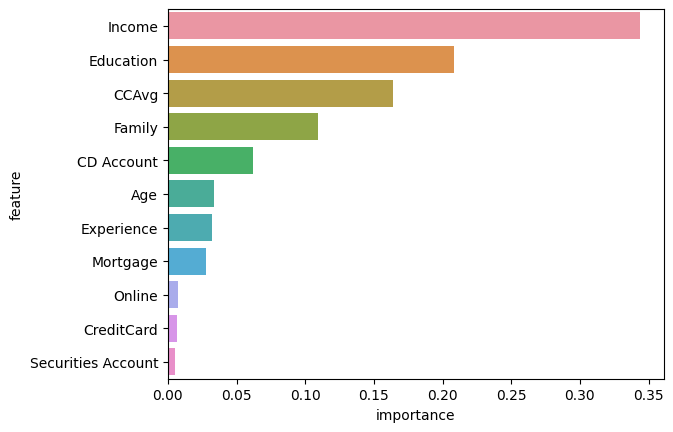

In [51]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

##### Note:

As per the model, the most important features which influence the customer in taking personal loan are listed below:

1. Income
2. Education level
3. CCAvg (Avg. spending on credit cards per month (thousand dollars))
4. Family size
5. CD Account (having certificate of deposit (CD) account or not)
6. Age
7. Mortgage

## Model registration


Random Forest Model accuracy =  0.9866666666666667

Test labels, Predicted labels


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

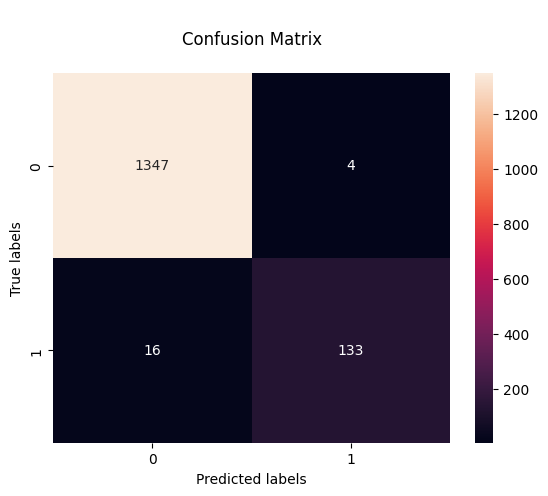

In [37]:
## Final Model 

rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=60)
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy10 = rf_clf.score(X_test, Y_test)
Y_predicted10 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy10)
print('\nTest labels, Predicted labels')
y_grid10 = (np.column_stack([Y_test, Y_predicted10]))
cm = metrics.confusion_matrix(Y_test, Y_predicted10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [42]:
## Change Drive path to your Folder
os.mkdir('../model_weights/')
os.mkdir('../model_features/')

In [44]:
## Let's save model weights
import joblib
# save
joblib.dump(rf_clf, "./model_weights/my_random_forest.joblib")

['./model_weights/my_random_forest.joblib']

In [46]:
## Save Final columns
final_columns = np.array(X_train.columns) 
joblib.dump(final_columns, "./model_features/train_features.joblib")

['./model_features/train_features.joblib']